In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [60]:
train.Transported.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [61]:
train.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [62]:
train.HomePlanet.groupby(train.Transported).value_counts()

Transported  HomePlanet
False        Earth         2651
             Mars           839
             Europa         727
True         Earth         1951
             Europa        1404
             Mars           920
Name: count, dtype: int64

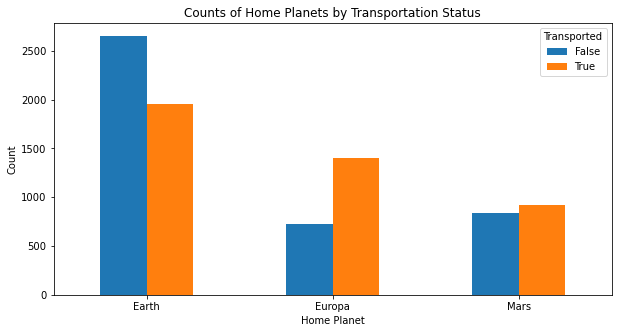

In [63]:
data_to_plot = train.groupby('Transported')['HomePlanet'].value_counts().unstack(level=0)

# Plotting
data_to_plot.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Home Planet')
plt.ylabel('Count')
plt.title('Counts of Home Planets by Transportation Status')
plt.xticks(rotation=0)  # Rotates the x labels for better readability
plt.legend(title='Transported')
plt.show()

In [64]:
train['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

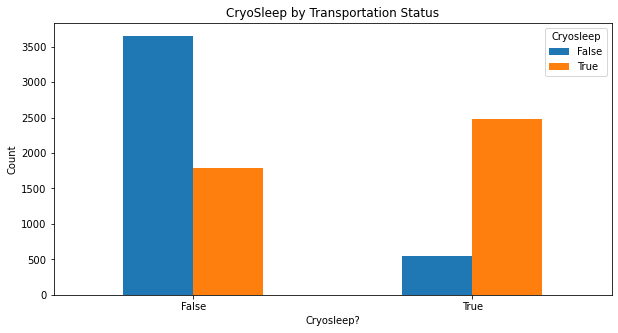

In [65]:
data_to_plot = train.groupby('Transported')['CryoSleep'].value_counts().unstack(level=0)

# Plotting
data_to_plot.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Cryosleep?')
plt.ylabel('Count')
plt.title('CryoSleep by Transportation Status')
plt.xticks(rotation=0)  # Rotates the x labels for better readability
plt.legend(title='Cryosleep')
plt.show()

seems to be an important predictor

In [66]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [67]:
train['Cabin'].nunique()

6560

In [68]:
train['Cabin'].head(10)

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
5    F/0/P
6    F/2/S
7    G/0/S
8    F/3/S
9    B/1/P
Name: Cabin, dtype: object

In [69]:
train['Cabin'].str.split('/')[0]

['B', '0', 'P']

In [70]:
train['Cabin'].fillna('null').apply(lambda x: x.split('/')[0]).head()

0    B
1    F
2    A
3    A
4    F
Name: Cabin, dtype: object

In [71]:
train['CabDeck'] = train['Cabin'].fillna('null').apply(lambda x: x.split('/')[0])
train['CabNum'] = train['Cabin'].fillna('null').apply(lambda x: x.split('/')[1])
train['CabSide'] = train['Cabin'].fillna('null').apply(lambda x: x.split('/')[2])

train.head()

IndexError: list index out of range